In [1]:
cov_iris<-cov(iris[,1:4])

In [2]:
# sumatoria de la diagonal principal de cov
s2 <- sum(diag(cov_iris))

# sumatoria del triangulo inferior o superior de cov
c2 <- sum(cov_iris[lower.tri(cov_iris)])

In [3]:
s2/(s2+c2)

[1] 0.6381978

In [4]:
iris1<-iris[1:50,3:4]
rc <- cor(iris1[,1], iris1[,2])
ri <- 1:10000

In [5]:
for (i in 1:10000) {
    ri[i]<-cor(iris1[,1], iris1[sample(1:50,50),2])
}

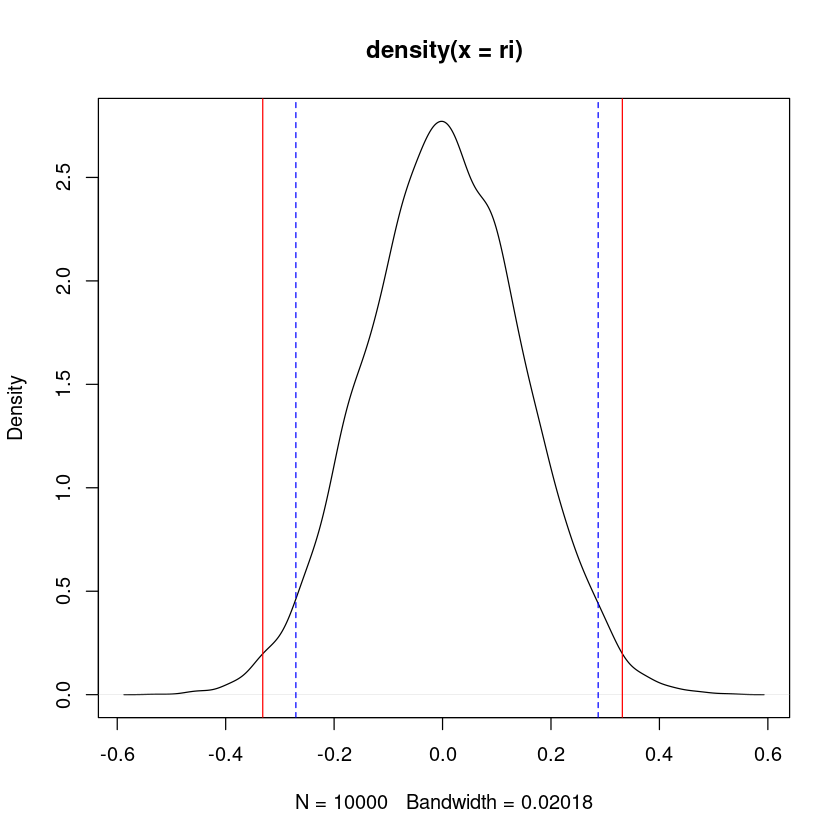

In [10]:
densidad<-density(ri)
plot(densidad)

# # Sombrear el área desde el mínimo al cuantil 0.025
# polygon(c(densidad$x[densidad$x <= quantile(ri, 0.025)], 
#           rev(densidad$x[densidad$x <= quantile(ri, 0.025)])), 
#         c(densidad$y[densidad$x <= quantile(ri, 0.025)], 
#           rep(0, sum(densidad$x <= quantile(ri, 0.025)))), 
#         col="lightblue", border=NA)

# # Sombrear el área desde el cuantil 0.975 hasta el máximo
# polygon(c(densidad$x[densidad$x >= quantile(ri, 0.975)], 
#           rev(densidad$x[densidad$x >= quantile(ri, 0.975)])), 
#         c(densidad$y[densidad$x >= quantile(ri, 0.975)], 
#           rep(0, sum(densidad$x >= quantile(ri, 0.975)))), 
#         col="lightblue", border=NA)

abline(v=c(rc,-rc), col="red")

abline(v=quantile(ri, c(0.025,0.975)), lty=2, col="blue")

In [11]:
f_densidad <- approxfun(densidad$x, densidad$y)

In [12]:
round(integrate(f_densidad, lower = rc, upper = max(ri))$value,4)

[1] 0.0105

In [13]:
round(integrate(f_densidad, lower = min(ri), upper = -rc)$value,4)

[1] 0.0093

In [17]:
pvalue <- integrate(f_densidad, lower = rc, upper = max(ri))$value + integrate(f_densidad, lower = min(ri), upper = -rc)$value
pvalue <- round(pvalue,4)
pvalue

[1] 0.0198